## <center> PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle

### 1. Постановка задачи и исходные данные

**Необходимо обучить модель, которая должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных.
Исходные данные - датасет, в котором содержатся сведения о 515 000 отзывов на отели Европы.**

Датасет содержит 17 полей со следующей информацией:

* *hotel_address* — адрес отеля;
* *additional_number_of_scoring* — есть некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* *review_date* — дата, когда рецензент разместил соответствующий отзыв;
* *average_score* — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* *hotel_name* — название отеля;
* *reviewer_nationality* — страна рецензента;
* *negative_review* — отрицательный отзыв, который рецензент дал отелю;
* *review_total_negative_word_counts* — общее количество слов в отрицательном отзыв;
* *positive_review* — положительный отзыв, который рецензент дал отелю;
* *review_total_positive_word_counts* — общее количество слов в положительном отзыве.
* *reviewer_score* — оценка, которую рецензент поставил отелю на основе своего опыта;
* *total_number_of_reviews_reviewer_has_given* — количество отзывов, которые рецензенты дали в прошлом;
* *total_number_of_reviews* — общее количество действительных отзывов об отеле;
* *tags* — теги, которые рецензент дал отелю;
* *days_since_review* — количество дней между датой проверки и датой очистки;
* *lat* — географическая широта отеля;
* *lng* — географическая долгота отеля.

In [13]:
# Импорт необходимых библиотек:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
# Загрузим данные.
# Данные для обучения модели:

hotels_train = pd.read_csv('hotels_train.csv')
print(hotels_train.shape)
hotels_train.head()

(386803, 17)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [15]:
# Данные для тестирования:

hotels_test = pd.read_csv('hotels_test.csv')
print(hotels_test.shape)
hotels_test.head()

(128935, 16)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644


In [16]:
# Объединим исходные датасеты hotels_test и hotels_train, чтобы подготовить данные для обучения.

# Поскольку в тестовом датасете отсутствует оценка рецензента (ее мы будем предсказывать),  
# заполняем данную колонку нулями:

hotels_test['reviewer_score'] = 0

# Переместим колонку с оценкой от рецензента в тренировочной выборке в конец (для успешного 
# объединения hotels_test и hotels_train:

tr_reviewer_score_col = hotels_train['reviewer_score'].to_frame()
hotels_train.drop(['reviewer_score'], axis = 1, inplace=True)
hotels_train = pd.concat(objs = [hotels_train, tr_reviewer_score_col], axis = 1, join = 'outer')

# Выведем размер таблицы и первые 5 строчек для проверки:

print(hotels_train.shape)
hotels_train.head()

(386803, 17)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,reviewer_score
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,10.0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,6.3
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,7.5
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,10.0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,9.6


In [17]:
# Объединим датасеты:

hotels = pd.concat([hotels_train, hotels_test], axis = 0)
print(hotels.shape)
hotels.head()

(515738, 17)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,reviewer_score
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,10.0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,6.3
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,7.5
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,10.0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,9.6


### 2. Разведывательный анализ данных

#### 2.1. Заполнение пропусков

In [18]:
# Посмотрим долю пропущенных значений в датасете:

hotels.isnull().mean()

hotel_address                                 0.000000
additional_number_of_scoring                  0.000000
review_date                                   0.000000
average_score                                 0.000000
hotel_name                                    0.000000
reviewer_nationality                          0.000000
negative_review                               0.000000
review_total_negative_word_counts             0.000000
total_number_of_reviews                       0.000000
positive_review                               0.000000
review_total_positive_word_counts             0.000000
total_number_of_reviews_reviewer_has_given    0.000000
tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006337
lng                                           0.006337
reviewer_score                                0.000000
dtype: float64

In [19]:
# Таким образом небольшие пропуски есть в столбцах lat и lng. Отберем строки с пропущенными 
# значениями:

hotels['lat_is_null'] = hotels['lat'].isnull()
hotels['lng_is_null'] = hotels['lng'].isnull()
mask1 = hotels['lat_is_null'] == True
mask2 = hotels['lng_is_null'] == True

# Скорее всего у одного адреса пропущены сразу обе координаты. Проверим количество строк 
# с заполненными и пропущенными значениями:

print(hotels['lat_is_null'].value_counts())
print(hotels['lng_is_null'].value_counts())

# Оно одинаково:

False    512470
True       3268
Name: lat_is_null, dtype: int64
False    512470
True       3268
Name: lng_is_null, dtype: int64


In [20]:
# Наидем адреса и наименования отелей с пропущенными координатами: 

hotels_lat_lng_is_null = hotels[mask1 & mask2][['hotel_address', 'hotel_name', 'lat', 'lng']]
hotels_lat_lng_is_null.groupby(['hotel_address', 'hotel_name']).mean()

,,lat,lng
hotel_address,hotel_name,,
20 Rue De La Ga t 14th arr 75014 Paris France,Mercure Paris Gare Montparnasse,NaN,NaN
23 Rue Damr mont 18th arr 75018 Paris France,Holiday Inn Paris Montmartre,NaN,NaN
4 rue de la P pini re 8th arr 75008 Paris France,Maison Albar Hotel Paris Op ra Diamond,NaN,NaN
Bail n 4 6 Eixample 08010 Barcelona Spain,NH Collection Barcelona Podium,NaN,NaN
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria,City Hotel Deutschmeister,NaN,NaN
Hasenauerstra e 12 19 D bling 1190 Vienna Austria,Hotel Park Villa,NaN,NaN
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,Fleming s Selection Hotel Wien City,NaN,NaN
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria,Cordial Theaterhotel Wien,NaN,NaN
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria,Hotel Daniel Vienna,NaN,NaN


In [21]:
# Отелей с пропущенными координатами всего 17. Самым правильным решением будет найти координаты 
# каждого отеля и заполнить недостающие значения.

# Создадим датафрейм с координатами (полученными с помощью Google Maps по наименованиям и адресам):

hotels_coord = {
    'hotel' : [
        '20 Rue De La Ga t 14th arr 75014 Paris France', 
        '23 Rue Damr mont 18th arr 75018 Paris France', 
        '4 rue de la P pini re 8th arr 75008 Paris France', 
        'Bail n 4 6 Eixample 08010 Barcelona Spain', 
        'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
        'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
        'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
        'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria',
        'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
        'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
        'Pau Clar s 122 Eixample 08009 Barcelona Spain',
        'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
        'Sep lveda 180 Eixample 08011 Barcelona Spain',
        'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
        'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
        'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
        'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria'
    ],
    'lat' : [48.838861, 48.888909, 48.875317, 41.391548, 48.220852, 48.233588, 48.209402, 
             48.209549, 48.188818, 48.222761, 41.392685, 48.219569, 41.384199, 48.246018, 
             48.213587, 48.216800, 48.220410],    
    'lng' : [2.318447, 2.330578, 2.320817, 2.175319, 11.488682, 11.467736, 16.350871,
            16.348888, 16.381204, 16.390912, 2.164823, 16.283017, 2.148535, 16.338658,
            16.377333, 16.357331, 16.353244]
}
hotels_coord_df = pd.DataFrame(hotels_coord)
hotels_coord_df



,hotel,lat,lng
0,20 Rue De La Ga t 14th arr 75014 Paris France,48.838861,2.318447
1,23 Rue Damr mont 18th arr 75018 Paris France,48.888909,2.330578
2,4 rue de la P pini re 8th arr 75008 Paris France,48.875317,2.320817
3,Bail n 4 6 Eixample 08010 Barcelona Spain,41.391548,2.175319
4,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...,48.220852,11.488682
5,Hasenauerstra e 12 19 D bling 1190 Vienna Austria,48.233588,11.467736
6,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,48.209402,16.350871
7,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...,48.209549,16.348888
8,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,48.188818,16.381204
9,Paragonstra e 1 11 Simmering 1110 Vienna Austria,48.222761,16.390912


In [22]:
# Напишем функции для заполнения новых столбцов с координатами центров городов в датафрейме hotels:

def lat_func(hotel_address):
    for i in range(17):
        if hotel_address == hotels_coord_df['hotel'][i]:
            hotel_lat = hotels_coord_df['lat'][i]
            return hotel_lat

hotels['hotel_lat'] = hotels['hotel_address'].apply(lat_func)

def lng_func(hotel_address):
    for i in range(17):
        if hotel_address == hotels_coord_df['hotel'][i]:
            hotel_lng = hotels_coord_df['lng'][i]
            return hotel_lng

hotels['hotel_lng'] = hotels['hotel_address'].apply(lng_func)

# Заполним пропущенные данные в столбцах lat и lat данными с координатами центров городов city_lat и city_lng:

hotels['lat'] = hotels['lat'].fillna(hotels['hotel_lat'])
hotels['lng'] = hotels['lng'].fillna(hotels['hotel_lng'])

# Посмотрим, остались ли пропущенные значения в датафрейме: 

hotels.isnull().mean()

# Пропущенных значений в интересующих нас столбцах нет.

hotel_address                                 0.000000
additional_number_of_scoring                  0.000000
review_date                                   0.000000
average_score                                 0.000000
hotel_name                                    0.000000
reviewer_nationality                          0.000000
negative_review                               0.000000
review_total_negative_word_counts             0.000000
total_number_of_reviews                       0.000000
positive_review                               0.000000
review_total_positive_word_counts             0.000000
total_number_of_reviews_reviewer_has_given    0.000000
tags                                          0.000000
days_since_review                             0.000000
lat                                           0.000000
lng                                           0.000000
reviewer_score                                0.000000
lat_is_null                                   0.000000
lng_is_nul

In [23]:
# Удалим столбцы hotel_lat, hotel_lng, lat_is_null и lng_is_null, которые больше не потребуются:

hotels.drop(['hotel_lat', 'hotel_lng', 'lat_is_null', 'lng_is_null'], axis = 1, inplace = True)

#### 2.2. Создание новых признаков

In [24]:
# Создадим числовые признаки - год и месяц, когда рецензент разместил соотвествующий отзыв:

hotels['review_date'] = pd.to_datetime(hotels['review_date'], dayfirst=False)
hotels['review_year'] = hotels['review_date'].dt.year
hotels['review_month'] = hotels['review_date'].dt.month

print('Тип данный признака "review_year" {}, признака "review_month" {}'.format(
    hotels['review_year'].dtype, hotels['review_month'].dtype))

Тип данный признака "review_year" int64, признака "review_month" int64


In [25]:
# Извлечем из признака hotel_address страну и город нахождения отеля. 
# Проанализировав несколько строчек признака hotel_address, можно заметить, что последним словом 
# адреса является страна,предпоследним - город (исключение - United Kingdom). Используем срезы 
# для создания новых признаков - hotel_country и hotel_city.

hotel_address_list = hotels['hotel_address'].str.split(' ')

hotels['hotel_country'] = hotel_address_list.apply(lambda x: 'United Kingdom' if x[-2] == 'United' 
                                                   else x[-1])

display(hotels['hotel_country'].value_counts().to_frame())

# При создания признака hotel_city учтем, что перед страной United Kingdom написаны значения 9SJ, 
# 0JJ, 5SY, 3AN и проч. (3 и 4 слово с конца). Это часть индексов в Лондоне. Таким образом, если 
# 5 с конца слово - London, город нахождения London:

hotels['hotel_city'] = hotel_address_list.apply(lambda x: 'London' if x[-5] == 'London' else x[-2])

display(hotels['hotel_city'].value_counts().to_frame())

,hotel_country
United Kingdom,262301
Spain,60149
France,59928
Netherlands,57214
Austria,38939
Italy,37207


,hotel_city
London,262301
Barcelona,60149
Paris,59928
Amsterdam,57214
Vienna,38939
Milan,37207


In [26]:
# Закодируем признаки hotel_country и hotel_city с помощью однократного кодирования (OneHotEncoding):

import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['hotel_country', 'hotel_city'], use_cat_names = True)
country_city_bin = encoder.fit_transform(hotels[['hotel_country', 'hotel_city']])
hotels = pd.concat([hotels, country_city_bin], axis = 1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 128934
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [27]:
# Создадим числовой признак reviewer_nationality_is_hotel_country проживает ли рецензент в стране, 
# в которой находится отель.
# Для этого сначала напишем функцию, удаляющую лишние символы из страны проживания, чтобы 
# в дальнейшем сравнивать эти значения с страной нахождения отеля:

def del_func(nationality):
    nationality = nationality[1:-1]
    res = nationality.strip()
    return res

hotels['reviewer_nationality_del'] = hotels['reviewer_nationality'].apply(del_func)

# Создадим промеждуточные датафреймы для сравнения: df_1 - с странами проживания рецензентов, 
# df_2 - с странами нахождения отелей:

df_1 = hotels['reviewer_nationality_del'].to_frame()
df_1.rename(columns = {'reviewer_nationality_del' : 'country'}, inplace = True)

df_2 = hotels['hotel_country'].to_frame()
df_2.rename(columns = {'hotel_country' : 'country'}, inplace = True)

# В датафрейм reviewer_nationality_is_hotel_country сохраним булевые значения, где True - страны 
# из двух датафреймов соответствуют друг другу, False - нет:

reviewer_nationality_is_hotel_country = df_1['country'].isin(df_2['country'])

# Создадим числовой признак reviewer_nationality_is_hotel_country проживает ли рецензент в стране, 
# в которой находится отель: 1 - если проживает, 0 - нет:

hotels['reviewer_nationality_is_hotel_country'] = reviewer_nationality_is_hotel_country.apply(lambda x: 1 if x  == True else 0)
hotels['reviewer_nationality_is_hotel_country'].to_frame()

,reviewer_nationality_is_hotel_country
0,1
1,1
2,0
3,1
4,0
...,...
128930,0
128931,0
128932,0
128933,0


In [28]:
# Преобразуем признак days_since_review - выделим только количество дней:

def days_func(days_since_review_col):
    days_since_review_list = days_since_review_col.split(' ')
    return days_since_review_list[0]

hotels['days_since_review'].apply(days_func)

0         531
1         203
2         289
3         681
4         516
         ... 
128930    547
128931    411
128932     28
128933    586
128934    589
Name: days_since_review, Length: 515738, dtype: object

In [29]:
# Импорт библиотеки для обработки естественного языка Python:

import nltk

# Загрузим корпус данных для анализа тональности:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

# Используем метод polarity_scores для анализа тональности негативных и позитивных отзывов. 
# Результаты запишем в столбцы neg_sent и pos_sent. Также, для того, чтобы эту информацию можно 
# было использовать в обучении модели, создадим отдельные признаки со значениями neg, neu, pos 
# и compound, которые определяют степень отрицательности, нейтральности, положительности и 
# общую тональность текста соответственно:

hotels['neg_sent'] = hotels['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

hotels['neg_sent_neg'] = hotels['neg_sent'].apply(lambda x: x['neg'])
hotels['neg_sent_neu'] = hotels['neg_sent'].apply(lambda x: x['neu'])
hotels['neg_sent_pos'] = hotels['neg_sent'].apply(lambda x: x['pos'])
hotels['neg_sent_cmpnd'] = hotels['neg_sent'].apply(lambda x: x['compound'])

hotels['pos_sent'] = hotels['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

hotels['pos_sent_neg'] = hotels['pos_sent'].apply(lambda x: x['neg'])
hotels['pos_sent_neu'] = hotels['pos_sent'].apply(lambda x: x['neu'])
hotels['pos_sent_pos'] = hotels['pos_sent'].apply(lambda x: x['pos'])
hotels['pos_sent_cmpnd'] = hotels['pos_sent'].apply(lambda x: x['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 128934
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [31]:
# Создадим признак - количество тегов, которые рецензент дал отелю:

# Для начала преобразуем признак tags в список:

def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)

# Узнаем длину списков из тегов, это и будет количество тегов у отеля:

hotels['tags_counts'] = hotels['tags_n'].apply(lambda x: len(x))
hotels['tags_counts'].to_frame()

,tags_counts
0,5
1,4
2,5
3,4
4,4
...,...
128930,4
128931,5
128932,4
128933,5


In [32]:
# Посмотрим сколько уникальных тегов представлено в наборе данных:

hotels_copy = hotels.copy()
tags_list = hotels_copy['tags_n'].explode('tags_n')
# unique_tags = tags_list.nunique()
tags_list.value_counts().head(20)

Leisure trip                      417778
Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
Solo traveler                     108545
Stayed 3 nights                    95821
Business trip                      82939
Group                              65392
Family with young children         61015
Stayed 4 nights                    47817
Double Room                        35207
Standard Double Room               32248
Superior Double Room               31393
Family with older children         26349
Deluxe Double Room                 24823
Double or Twin Room                22393
Stayed 5 nights                    20845
Standard Double or Twin Room       17483
Classic Double Room                16989
Name: tags_n, dtype: int64

In [33]:
# Создадим новый признак submitted from a mobile device - было ли выполнено бронирование с помощью
# мобильного устройства:

def tag_mob_func(tags_n_col):
    for i in range(len(tags_n_col)):
        if tags_n_col[i] != 'Submitted from a mobile device':
            i += 1
        else:
            return 1
    return 0

hotels['submitted from a mobile device'] = hotels['tags_n'].apply(tag_mob_func)
hotels['submitted from a mobile device'].value_counts()

1    307640
0    208098
Name: submitted from a mobile device, dtype: int64

In [34]:
# Создадим признаки цели везитов - отдыха (leisure trip purpose) и коммандировки 
# (business trip purpose):

def leisure_trip_func(tags_n_col):
    for i in range(len(tags_n_col)):
        if tags_n_col[i] != 'Leisure trip':
            i += 1
        else:
            return 1
    return 0
hotels['leisure trip purpose'] = hotels['tags_n'].apply(leisure_trip_func)
display(hotels['leisure trip purpose'].value_counts())

def business_trip_func(tags_n_col):
    for i in range(len(tags_n_col)):
        if tags_n_col[i] != 'Business trip':
            i += 1
        else:
            return 1
    return 0

hotels['business trip purpose'] = hotels['tags_n'].apply(business_trip_func)
display(hotels['business trip purpose'].value_counts())

1    417778
0     97960
Name: leisure trip purpose, dtype: int64

0    432799
1     82939
Name: business trip purpose, dtype: int64

In [35]:
# Посмотрим на датафрейм hotels с новыми признаками:

hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 128934
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

#### 2.3. Удаление нечисловых признаков

In [36]:
# Удалим нечисловые признаки из датасета:

object_columns = [col for col in hotels.columns if hotels[col].dtypes == 'object' or hotels[col].dtypes == 'datetime64[ns]']
hotels.drop(object_columns, axis = 1, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 128934
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   reviewer_score                              515738 non-null  float64
 9   review_year                                 515738 non-null  int64  
 

#### 2.4. Отбор признаков

##### 2.4.1. Анализ мультиколлинеарности

<Axes: >

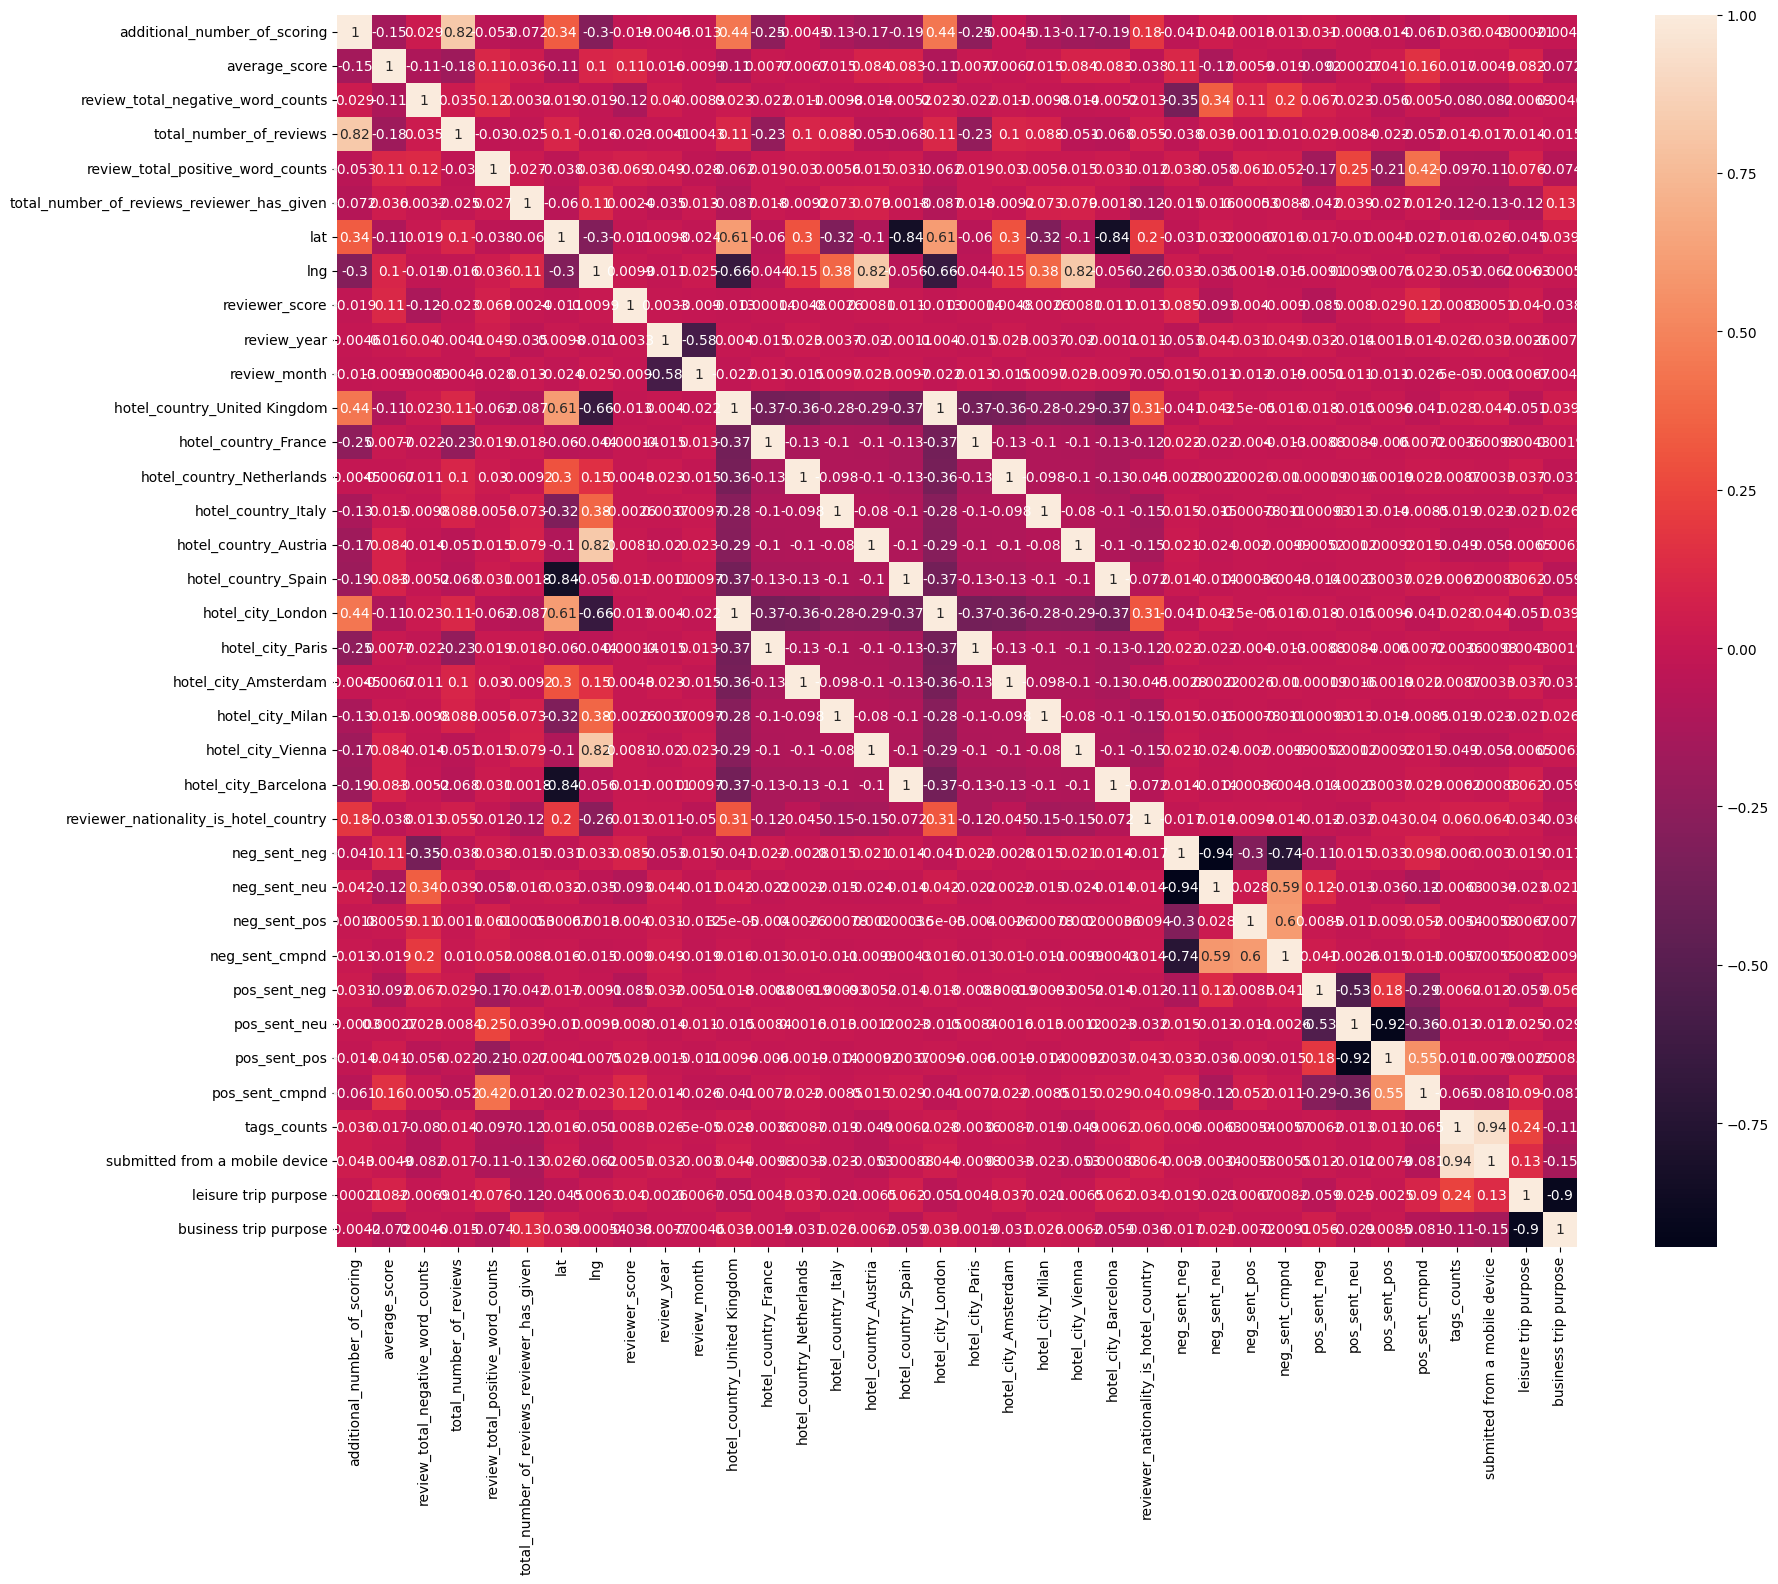

In [37]:
# Выведем тепловую матрицу корреляций всех признаков, участвующих в исследовании, для проведения 
# анализа мультиколлинеарности:

plt.figure(figsize = (20, 16))
sns.heatmap(hotels.corr(), annot = True)

При коэффициенте корреляции 0.7 связь является сильной и приводит к мультиколлинеальности признаков.
На основании графика можно сделать вывод, что следующие признаки обладают мультиколлинеарностью:

* hotel_country_Spain и lat
* hotel_city_Barcelona и lat
* hotel_country_Austria и lng
* hotel_city_Vienna и lng
* neg_sent_neu и neg_sent_neg
* neg_sent_cmpnd и neg_sent_neg
* pos_sent_pos и pos_sent_neu
* submitted from a mobile device и tags_counts
* leisure trip purpose и business trip purpose

Признаки с обозначением степени отрицательности (neg) и положительности (pos) наиболее важны для исследования, т.к. являются непосредственной характеристикой, насколько понравился или не понравился отель рецензенту, и скорее всего важнее признаков нейтральности (neu) и общей тональности текста (compound). Проверим это далее в статистическом анализе и удалим наименее значимые признаки из датасета.

Также признак географической широты (lat) очень сильно коррелирует с hotel_city_Barselona и hotel_country_Spain, признак географической долготы (lng) с с hotel_city_Vienna и hotel_country_Austria, признак бронирования с помощью мобильного устройства (submitted from a mobile device) и количеством тегов (tags_counts), а цель поездки - отдых (leisure trip purpose), с целью поездки - коммандировка (business trip purpose). После статистического анализа удалим самые незначимые признаки.

In [38]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 128934
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   reviewer_score                              515738 non-null  float64
 9   review_year                                 515738 non-null  int64  
 

In [39]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели: Х - данные 
# с информацией об отелях, у - целевая переменная (рейтинги отелей):

X = hotels[hotels['reviewer_score'] != 0].drop(['reviewer_score'], axis = 1)
y = hotels[hotels['reviewer_score'] != 0]['reviewer_score']
hotels_test = hotels[hotels['reviewer_score'] == 0].drop(['reviewer_score'], axis = 1)

In [40]:
# Проверяем размер hotels_test:

hotels_test.shape

(128935, 35)

### 3. Оценка значимости признаков

Для оценки значимости *категориальных* признаков будем использовать **тест хи-квадрат**, для *непрерывных* признаков — **тест ANOVA**.

In [41]:
# Разделим признаки по типу:

# Непрерывные признаки:
num_cols = ['additional_number_of_scoring', 'total_number_of_reviews', 'review_total_negative_word_counts', 
            'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 
            'tags_counts', 'neg_sent_neg', 'neg_sent_pos', 'neg_sent_neu', 'neg_sent_cmpnd', 
            'pos_sent_neg', 'pos_sent_pos', 'pos_sent_neu', 'pos_sent_cmpnd', 'lng', 'lat']

# Категориальные признаки:
cat_cols = ['average_score', 'hotel_country_United Kingdom', 'hotel_country_France', 
            'hotel_country_Netherlands', 'hotel_country_Italy', 'hotel_country_Austria', 
            'hotel_country_Spain', 'hotel_city_London', 'hotel_city_Paris', 'hotel_city_Amsterdam', 
            'hotel_city_Milan', 'hotel_city_Vienna', 'hotel_city_Barcelona', 'reviewer_nationality_is_hotel_country',
            'review_year', 'review_month', 'submitted from a mobile device', 'leisure trip purpose',
           'business trip purpose']

#### 3.1. Оценка значимости категориальных признаков

<Axes: >

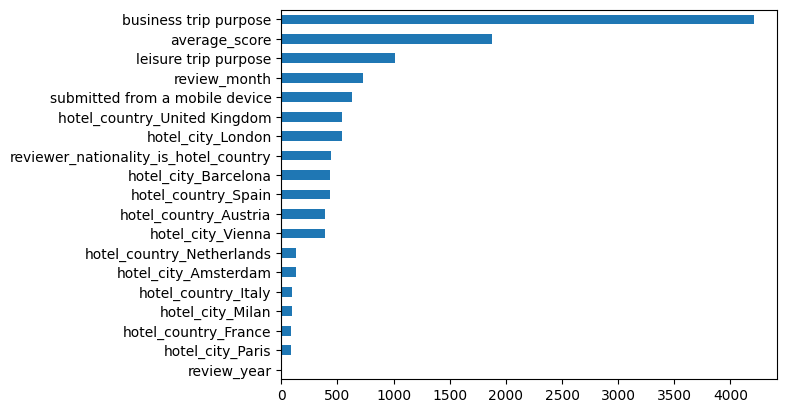

In [42]:
# Используем непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает 
# массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

y = y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

*Вывод по графику:* признак review_year не имеет никакой значимости в определении рейтинга отеля. Удалим его, чтобы не использовать в обучении модели.
Также удалим признак цели поездки - отдых (leisure trip purpose). Он коррелирует с business trip purpose и менее значим.

#### 3.2. Оценка значимости непрерывных признаков

<Axes: >

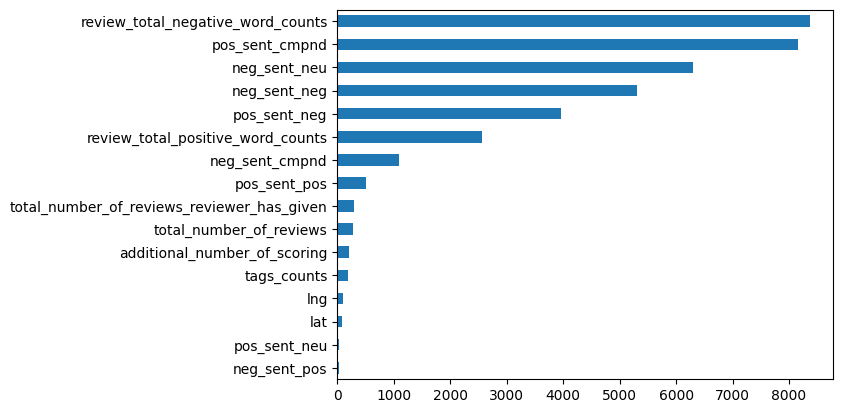

In [43]:
# Используем функцию f_classif из библиотеки sklearn. В основе метода оценки значимости переменных лежит анализ ANOVA. 
# Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

# Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости используем значение 
# f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный 
# признак для нашей модели.

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

*Вывод по графику:* наименее значимыми непрерывными признаками являются степень положительности негативных отзывов (neg_sent_pos) и степень нейтральности положительных отзывов (pos_sent_neu). Удаляем данные признаки, тем более pos_sent_neu коррелирует с pos_sent_pos.

И географическая долгота отеля (lng), и географическая долгота отеля (lng) также являются наименее значимыми. Т.к. они коррелируют с четырьмя другими признаками, удалим их.

Разберемся с другими признаками, которые коррелируют между собой, и оценим их значимость:

* neg_sent_neu и neg_sent_neg 
* neg_sent_cmpnd и neg_sent_neg
* submitted from a mobile device и tags_counts

Общая тональность негативных комментариев (neg_sent_cmpnd) и (neg_sent_neu) наименее значима, поэтому удалим данные признаки, коррелирующие с neg_sent_neg.

submitted from a mobile device - наиболее значим, удаляем tags_counts.


In [44]:
# Удаление признаков:

hotels.drop(['review_year', 'leisure trip purpose', 'neg_sent_pos', 'pos_sent_neu', 'lng', 'lat', 
             'neg_sent_cmpnd', 'neg_sent_neu', 'tags_counts', ], axis = 1, inplace=True)

In [45]:
# Обновим значения X, y и hotels_test:

X = hotels[hotels['reviewer_score'] != 0].drop(['reviewer_score'], axis = 1)
y = hotels[hotels['reviewer_score'] != 0]['reviewer_score']
hotels_test = hotels[hotels['reviewer_score'] == 0].drop(['reviewer_score'], axis = 1)
hotels_test.shape

(128935, 26)

### 4. Обучение модели

In [46]:
# Загружаем специальный инструмент для разбивки данных:  

from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [47]:
# Импортируем необходимые библиотеки:
  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель:  

regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных: 
 
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred:  

y_pred = regr.predict(X_test) 

In [48]:
# Далее необходимо сравнить предсказанные значения (y_pred) с реальными (y_test).
 
# Используем метрику Mean Absolute Percentage Error (MAPE), которая показывает среднюю абсолютную 
# процентную ошибку предсказанных значений от фактических: 

print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1263705424641313


### 5.Предсказание на тестовых данных

In [49]:
# Следующий этап — предсказание на тестовых данных. Для этого снова запускаем функцию 
# regr.predict, передав ей тестовый набор данных test_data:

test_pred = regr.predict(hotels_test)
test_pred

array([8.53 , 7.773, 8.879, ..., 7.8  , 9.692, 7.377])

In [50]:
# Посмотрим на данные submission.csv:

submission = pd.read_csv('submission.csv')
print(submission.shape)
submission.head()

(128935, 2)


,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


In [51]:
# Добавим в submission предсказанные значения рейтингов:

submission['reviewer_score'] = test_pred
submission.to_csv('booking_model_submission_AnastasiaSh.csv', index = False)

### 5. Результат

Таким образом, MAPE модели составляет - 
Наиболее значимыми признаками, влияющими на рейтинг отеля, являются: тональность и количество слов в комментариях, цель путешествия - коммандировка и средний рейтинг отеля. 